# Hands on with YOLO
## PyTorch Implementation:

For applications that require YOLO implementations within a PyTorch environment, the Ultralytics organization provides a pre-trained YOLOv5 model readily accessible through the PyTorch Hub: https://pytorch.org/hub/ultralytics_yolov5/. This resource offers a convenient starting point for leveraging YOLOv5 functionalities, enabling developers to harness the power of YOLOv5 within their PyTorch workflows.

# References
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#12-create-labels
- https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/
- https://pytorch.org/hub/ultralytics_yolov5/

# Inference
Note that in order to run this notebook on Colab, you have to update the default version of Pillow and then restart the runtime for it to take effect. The following cell should lead to the runtime reporting that it crashes as we restart the runtime. This is intended behaviour!

In [1]:
# ultralytics requires Pillow>=10.3.0
# the colab instance already loads pillow, so we update pillow then forcibly restart the runtime
!pip install ultralytics Pillow==10.3.0 gitpython>=3.1.30

import PIL
if PIL.__version__ != "10.3.0":
  # restart runtime if incorrect version loaded
  import os
  os.kill(os.getpid(), 9)

In [2]:
from ultralytics import YOLO
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)

# Images
imgs = ['https://www.ultralytics.com/images/zidane.jpg', 'https://www.ultralytics.com/images/bus.jpg']  # batch of images

# Inference
results = model(imgs, size=640)

# Results
results.print()
results.save()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-7 Python-3.10.12 torch-2.2.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 129MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/2: 720x1280 2 perso

In [3]:
results.show()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# results in pandas
for idx, i in enumerate(imgs):
    print(results.pandas().xyxy[idx])

         xmin        ymin         xmax        ymax  confidence  class    name
0  742.896973   47.978394  1141.142212  716.822998    0.880724      0  person
1  442.038971  437.349854   496.719574  709.882935    0.687266     27     tie
2  125.215088  193.606750   710.841187  713.070251    0.642235      0  person
3  982.893311  308.404541  1027.329590  420.230103    0.263047     27     tie
         xmin        ymin        xmax        ymax  confidence  class    name
0  220.868454  407.421539  345.723816  874.687561    0.835148      0  person
1  662.574097  386.164673  810.000000  880.366516    0.828944      0  person
2   57.571339  397.307159  214.798309  918.241821    0.785364      0  person
3   14.668499  222.189133  798.409363  784.870972    0.781435      5     bus
4    0.000000  553.405945   72.457405  874.678162    0.464943      0  person


# Inference Settings
Inference Settings
YOLOv5 models offer a range of inference attributes that can be adjusted to optimize object detection performance. These attributes include:
- Confidence Threshold: The minimum confidence level required for a detection to be considered valid
- IoU Threshold: The minimum intersection over union (IoU) required for a detection to be considered a true positive
- Other attributes: Additional settings that can be adjusted to fine-tune inference performance

These attributes can be feed into the model function during setup:

In [5]:
model.conf = 0.25  # NMS confidence threshold
iou = 0.45  # NMS IoU threshold
agnostic = False  # NMS class-agnostic
multi_label = False  # NMS multiple labels per box
classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
max_det = 1000  # maximum number of detections per image
amp = False  # Automatic Mixed Precision (AMP) inference

# these can be feed into the model by simply feeding it into the model setup
results = model(imgs, size=320)  # custom inference size

# Via Ultralytics Packages
The Ultralytics packages offer an alternative approach to utilizing YOLOv5, with a slightly different syntax and results output format compared to the PyTorch Hub versions. While the overall functionality remains similar, the Ultralytics packages provide a distinct implementation that can be leveraged for specific use cases that could offer more flexibility.

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
# load a custom model
# model = YOLO('path/to/best.pt')

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='result.jpg')
    # result.show()  # display to screen


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 197.3ms
Speed: 9.0ms preprocess, 197.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


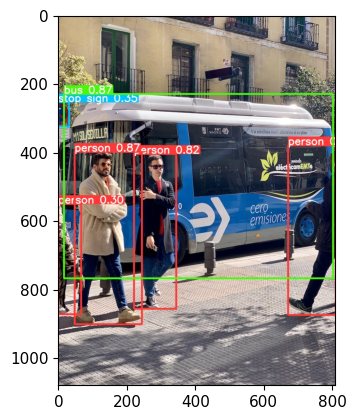

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open('result.jpg'))
plt.show()

# Notes
There is also good information on the training on custom data on ultralytics page:
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data.

Datasets for detection/segmentation etc
- https://docs.ultralytics.com/datasets/detect/argoverse/